In [59]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import networkx as nx 
from sklearn.neighbors import kneighbors_graph
from numpy import linalg as LA


m = 1
X1 = np.array([[1]])
X2 = np.array([[np.sqrt(2)]])
learning_rate = 0.1
alpha = [1, 2]
num_stations = 2
max_iter = 5


G_FMI = nx.Graph()
G_FMI.add_nodes_from(range(num_stations))
G_FMI.nodes[0]['X_train'] = X1
G_FMI.nodes[0]['y_train'] = np.array([1])
G_FMI.nodes[1]['X_train'] = X2
G_FMI.nodes[1]['y_train'] =np.array([1])
G_FMI.add_edge(0, 1)


def FedGD_alpha(G_FMI, max_iter, num_stations, alpha, learning_rate):
    for node in G_FMI.nodes:
        G_FMI.nodes[node]['weights'] = 0.0
    
    losses_station1 = []
    losses_station2 = []
    for k in range(max_iter):
        for i in range(num_stations):
            X_train = G_FMI.nodes[i]['X_train']
            y_train = G_FMI.nodes[i]['y_train']
            local_model = G_FMI.nodes[i]['weights']

            loss = mean_squared_error(y_train, np.dot(X_train, local_model))
            if i == 0:
                losses_station1.append(loss)
            else:
                losses_station2.append(loss)

            gradient = (2 / len(y_train)) * np.dot(X_train.T, (y_train - np.dot(X_train, local_model)))

            updated_weights = local_model + learning_rate * gradient
            for neighbor in G_FMI.neighbors(i):
                neighbor_model = G_FMI.nodes[neighbor]['weights']
                updated_weights += learning_rate * 2 * alpha * (neighbor_model - local_model)

            G_FMI.nodes[i]['new_weights'] = updated_weights
        for i in range(num_stations):
            G_FMI.nodes[i]['weights'] = G_FMI.nodes[i]['new_weights'].copy()

    return losses_station1, losses_station2

In [60]:
losses_station1_alpha1, losses_station2_alpha1 = FedGD_alpha(G_FMI, max_iter, num_stations, alpha[0], learning_rate)

losses_station1_alpha2, losses_station2_alpha2 = FedGD_alpha(G_FMI, max_iter, num_stations, alpha[1], learning_rate)



In [61]:
losses_station1_alpha1, losses_station1_alpha2

([1.0,
  0.6400000000000001,
  0.38866678220690354,
  0.23703549801218282,
  0.1486935921434641],
 [1.0,
  0.6400000000000001,
  7.148717137543349,
  67213.55921515414,
  421122205.3482697])

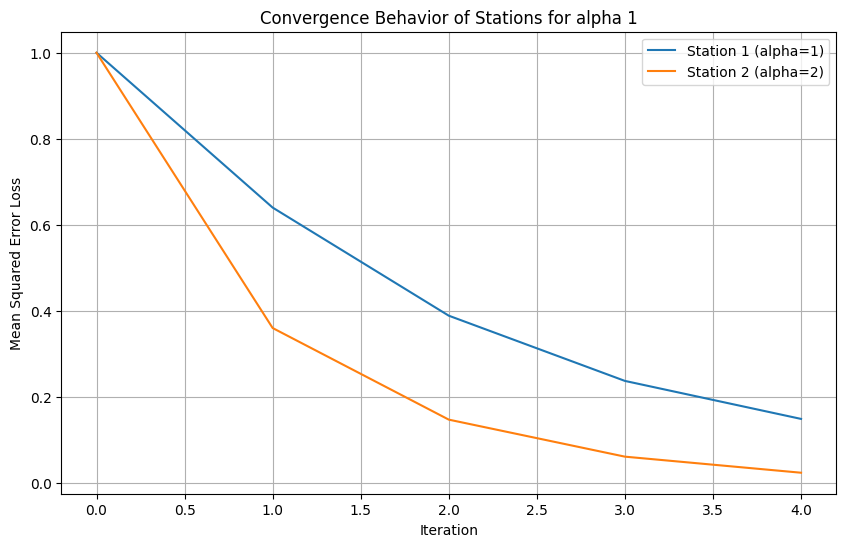

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(range(max_iter), losses_station1_alpha1, label='Station 1 (alpha=1)')
plt.plot(range(max_iter), losses_station2_alpha1, label='Station 2 (alpha=2)')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error Loss')
plt.title('Convergence Behavior of Stations for alpha 1')
plt.legend()
plt.grid(True)
plt.show()

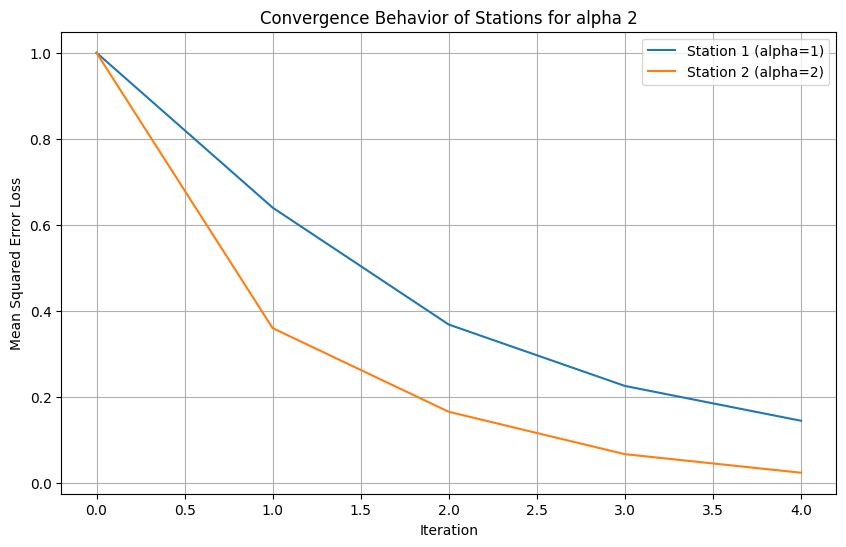

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(range(max_iter), losses_station1_alpha2, label='Station 1 (alpha=1)')
plt.plot(range(max_iter), losses_station2_alpha2, label='Station 2 (alpha=2)')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error Loss')
plt.title('Convergence Behavior of Stations for alpha 2')
plt.legend()
plt.grid(True)
plt.show()